(array([ 1.    ,  1.    ,  0.9989]), array([ 1.,  1.,  1.]))


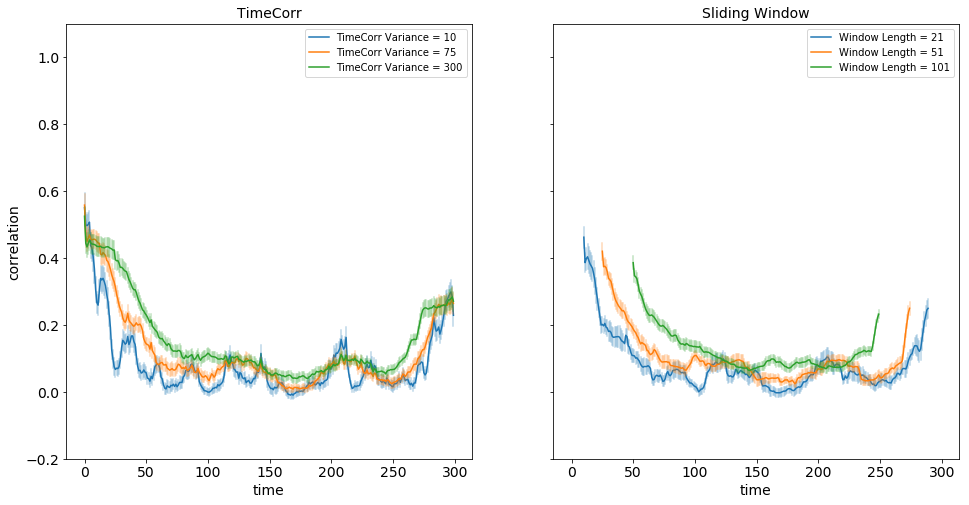

In [10]:
import numpy as np
from scipy.linalg import cholesky
from scipy.spatial.distance import squareform
from scipy.stats.stats import pearsonr
import sys
import os
from math import sqrt
import matplotlib.pyplot as plt
from math import log
tc_var=[10,75,300]
sw_len=[21,51,101]

f, (ax1,ax2) = plt.subplots(1,2, sharey='row', sharex=True, figsize=(16,8))

ax1.set_title("TimeCorr",fontsize=14)
ax2.set_title("Sliding Window",fontsize=14)
ax1.set_ylabel("correlation",fontsize=14)
# ax2.set_ylabel("correlation",fontsize=14)
# ax1.set_xlabel("level")
# ax2.set_xlabel("level")
data = np.load("../data/circular_analysis/word_circular.npz") 
tc_mean,sw_mean,tc_std,sw_std,tc_accuracy,sw_accuracy = data['arr_0'],data['arr_1'],data['arr_2'],data['arr_3'],data['arr_4'],data['arr_5']
config_num, time_len = tc_mean.shape

print(tc_accuracy,sw_accuracy)

for i in range(config_num):
    lower_limit, upper_limit = int(sw_len[i]/2),(time_len-int(sw_len[i]/2))
    ax1.plot(range(time_len),tc_mean[i],c='C'+str(i),linestyle='-',alpha=1.0, label = "TimeCorr Variance = "+str(tc_var[i]))
    ax1.plot([range(time_len) for z in range(2)],[tc_mean[i]+tc_std[i]*10,tc_mean[i]-tc_std[i]*10],c='C'+str(i),linestyle='-',alpha=0.3)
    
    ax2.plot(range(lower_limit,upper_limit),sw_mean[i,lower_limit:upper_limit],c='C'+str(i),linestyle='-',alpha=1.0, label = "Window Length = "+str(sw_len[i]))
    ax2.plot([range(lower_limit,upper_limit) for z in range(2)],[sw_mean[i,lower_limit:upper_limit]+tc_std[i,lower_limit:upper_limit]*10,sw_mean[i,lower_limit:upper_limit]-tc_std[i,lower_limit:upper_limit]*10],c='C'+str(i),linestyle='-',alpha=0.3)
    
ax1.legend(loc='upper right')
ax1.set_ylim(-0.2, 1.1)
ax1.set_xlabel("time",fontsize=14)
ax1.tick_params(labelsize=14)

ax2.legend(loc='upper right')
ax2.set_ylim(-0.2, 1.1)
ax2.set_xlabel("time",fontsize=14)
ax2.tick_params(labelsize=14)

plt.show()
    